# 1.1 Keras tutorial
이번 실습에서는 keras를 이용하여 간단한 모델을 생성하고, 학습하여 성능을 평가한다.

In [1]:
%matplotlib inline
from tensorflow import keras
#import keras
import numpy as np
import matplotlib.pyplot as plt

2022-04-13 15:18:06.624789: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


## (1)데이터셋 준비
Input(x)와 Output(y) 간의 관계(y=x*3)를 학습하기 위한 데이터셋 준비

In [2]:
x = np.arange(20) # 0, 1, 2, 3...., 19
y = x * 3
x_test =np.arange(50,70)
y_test = x_test*3
n_in =1
n_out =1

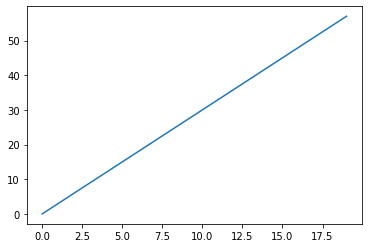

In [3]:
plt.plot(x,y)

## (2) Keras 모델링
keras.layers : 모델을 구성하기 위한 layer들이 구현되어 있는 모듈

keras.models : layer들을 묶어 모델을 정의하고 학습, 평가, 예측 등의 기능을 구현한 모듈

In [4]:
from tensorflow.keras import models, layers

Keras에서는 크게 Functional, Sequential 방식으로 모델을 구현

Function 방식은 모델을 수식처럼 구현

Sequential 방식은 모델에 필요한 layer들을 순차적으로 더해가는 방식으로 구현

<사용되는 Layer>

Input : 모델에 입력되는 데이터의 batch size를 제외한 shape을 결정

Dense : Fully Connected Layer

https://keras.io/layers/core/#dense

### Sequential Modeling

In [5]:
def modeling_sequential(n_in, n_out):
    model = models.Sequential()
    model.add(layers.Dense(units =n_out, input_shape=(n_in,)))
    return model

In [6]:
class modeling_sequential_class(models.Sequential):
    def __init__(self, n_in, n_out):
        
        #멤버 변수로 모델에 사용할 변수 선언
        self.n_in = n_in
        self.n_out = n_out
        
        #상속받은 Sequential 클래스 초기화 후 레이어 추가
        super().__init__()
        self.add(layers.Dense(units =n_out, input_shape=(n_in,)))

### Functional Modeling

In [7]:
def modeling_functional(n_in, n_out):
    x = layers.Input(shape=(n_in,))
    y = layers.Dense(n_out)(x)
    model = models.Model(inputs = x, outputs = y)
    return model

In [8]:
class modeling_functional_class(models.Model):
    def __init__(self, n_in, n_out):
        
        #멤버 변수로 모델에 사용할 변수 및 레이어 선언
        self.n_in = n_in
        self.n_out = n_out
        input = layers.Input(shape=(n_in,))
        output = layers.Dense(n_out)
        
        # layer 연결
        x = input
        y = output(x)

        #상속받은 Model 클래스 초기화
        super().__init__(x, y)

### 모델 확인하기
생성된 모델은 내부함수인 summary()나, vis_utils의 model_to_dot()으로 모델 내부의 layers 구조 및 파라미터 수 등을 확인할 수 있음

In [9]:
model =  modeling_sequential(n_in, n_out)
model.summary()

2022-04-13 15:18:30.449855: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-04-13 15:18:30.451479: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-04-13 15:18:30.521078: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:b3:00.0 name: NVIDIA RTX A5000 computeCapability: 8.6
coreClock: 1.695GHz coreCount: 64 deviceMemorySize: 23.68GiB deviceMemoryBandwidth: 715.34GiB/s
2022-04-13 15:18:30.521128: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2022-04-13 15:18:30.524759: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2022-04-13 15:18:30.524861: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2022

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [10]:
model =  modeling_sequential_class(n_in, n_out)
model.summary()

Model: "modeling_sequential_class"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [11]:
model =  modeling_functional(n_in, n_out)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [12]:
model = modeling_functional_class(n_in, n_out)
model.summary()

Model: "modeling_functional_class"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


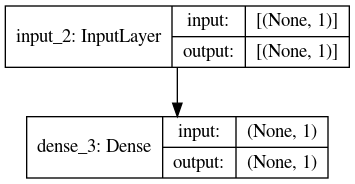

In [13]:
from tensorflow.keras.utils import plot_model
%matplotlib inline

plot_model(model, show_shapes=True)

## (3) 모델의 학습과정 설정
생성한 모델 객체의 compile 함수를 사용하여 학습과정 설정

모델의 학습시킬 때 사용할 loss function, optimizer, metric 등을 설정

https://keras.io/models/model/

In [18]:
model.compile(loss='mse', optimizer='sgd')

## (4) 모델 학습시키기
모델 객체의 fit 함수를 사용하여 모델을 학습

fit 함수는 학습과정이 담겨있는 history 객체를 반환

In [19]:
history = model.fit(x, y, batch_size=5, epochs=100, validation_split=0.2)

ValueError: `validation_split` is only supported for Tensors or NumPy arrays, found following types in the input: [<class 'numpy.int64'>, <class 'numpy.float32'>]

## (5) 모델 평가하기
모델 객체의 evaluate 함수로 test 데이터에 대한 모델의 성능을 평가

In [16]:
loss= model.evaluate(x_test, y_test, batch_size=20)
print('loss : %.4f'%(loss))

1/1 [==============================] - 0s 53ms/step - loss: 0.0417
loss : 0.0417


## (6) 모델 사용하기
모델 객체의 predict 함수로 input 데이터에 대한 모델의 예측결과를 반환

In [17]:
new_x = np.arange(100,120)
true_y = new_x*3

pred_y = model.predict(new_x, batch_size=20)
pred_y = np.reshape(pred_y,(-1,))
for y in zip(true_y, pred_y):
    print("true y : %.2f, prediction y : %.2f"%(y[0], y[1]))

true y : 300.00, prediction y : 299.65
true y : 303.00, prediction y : 302.64
true y : 306.00, prediction y : 305.64
true y : 309.00, prediction y : 308.63
true y : 312.00, prediction y : 311.63
true y : 315.00, prediction y : 314.63
true y : 318.00, prediction y : 317.62
true y : 321.00, prediction y : 320.62
true y : 324.00, prediction y : 323.62
true y : 327.00, prediction y : 326.61
true y : 330.00, prediction y : 329.61
true y : 333.00, prediction y : 332.60
true y : 336.00, prediction y : 335.60
true y : 339.00, prediction y : 338.60
true y : 342.00, prediction y : 341.59
true y : 345.00, prediction y : 344.59
true y : 348.00, prediction y : 347.59
true y : 351.00, prediction y : 350.58
true y : 354.00, prediction y : 353.58
true y : 357.00, prediction y : 356.57
